### OLS Task01
#### 쇼핑 고객 데이터

- Customer ID: 고객 아이디
- Gender: 고객의 성별
- Age: 고객의 나이
- Annual Income: 고객의 연소득
- Spending Score: 고객 행동 및 지출 성격에 따라 상점에서 할당한 점수
- Profession: 직업, 전문직
- Work Experience: 고객의 근무 경력(연 단위)
- Family Size: 가족 구성원 수

In [1]:
import pandas as pd

c_df = pd.read_csv('./datasets/customers.csv')
c_df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [2]:
c_df.Profession.value_counts()

Profession
Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: count, dtype: int64

In [4]:
columns = ['Age', 'Family Size', 'Annual Income ($)', 'Work Experience', 'Spending Score (1-100)']
pre_c_df = c_df.loc[:, columns]
pre_c_df

,Age,Family Size,Annual Income ($),Work Experience,Spending Score (1-100)
0,19,4,15000,1,39
1,21,3,35000,3,81
2,20,1,86000,1,6
3,23,2,59000,0,77
4,31,6,38000,2,40
...,...,...,...,...,...
1995,71,7,184387,8,40
1996,91,7,73158,7,32
1997,87,2,90961,9,14
1998,77,2,182109,7,4


In [6]:
pre_c_df.corr()['Spending Score (1-100)'].sort_values(ascending=False)[1:]

Annual Income ($)    0.023299
Family Size          0.002232
Work Experience     -0.028948
Age                 -0.041798
Name: Spending Score (1-100), dtype: float64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Family Size'}>],
       [<Axes: title={'center': 'Annual Income ($)'}>,
        <Axes: title={'center': 'Work Experience'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >]],
      dtype=object)

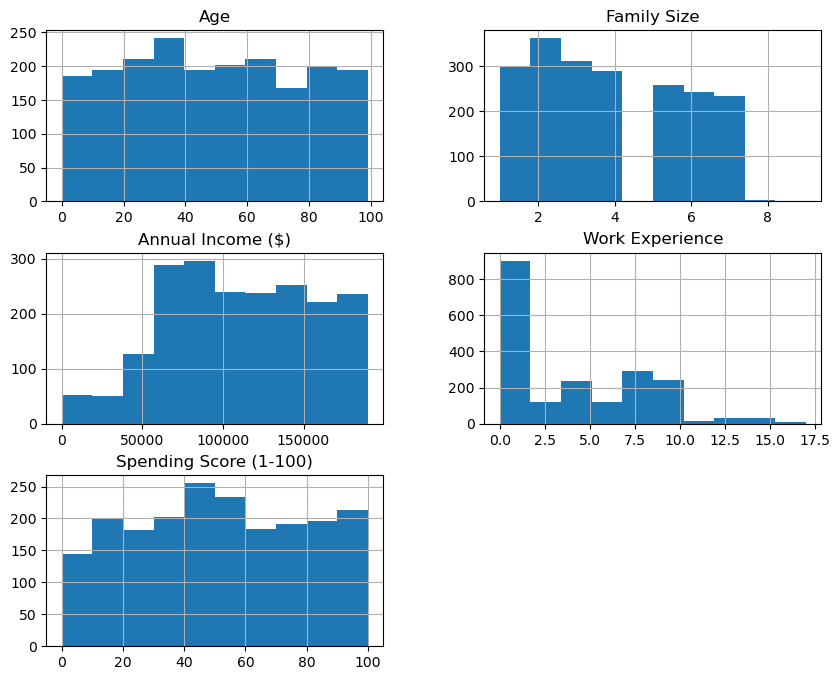

In [8]:
pre_c_df.hist(figsize=(10, 8))

<Axes: >

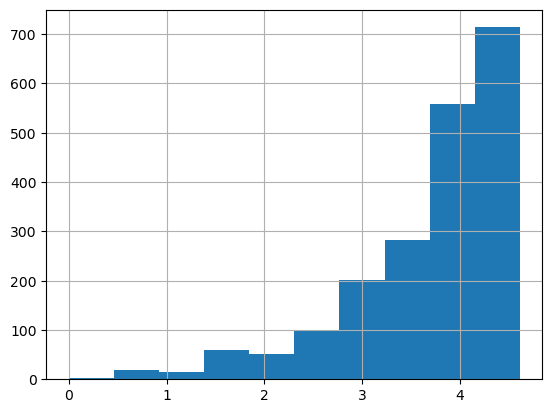

In [9]:
import numpy as np
np.log1p(pre_c_df['Spending Score (1-100)']).hist()

In [11]:
from statsmodels.api import OLS

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                   OLS Regression Results                                  
Dep. Variable:     Spending Score (1-100)   R-squared (uncentered):                   0.708
Model:                                OLS   Adj. R-squared (uncentered):              0.708
Method:                     Least Squares   F-statistic:                              1212.
Date:                    Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                            09:17:31   Log-Likelihood:                         -9730.3
No. Observations:                    2000   AIC:                                  1.947e+04
Df Residuals:                        1996   BIC:                                  1.949e+04
Df Model:                               4                                                  
Covariance Type:                nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [13]:
get_vif(features)

,vif_score,feature
0,3.172253,Age
1,3.746431,Family Size
2,4.533660,Annual Income ($)
3,1.993979,Work Experience


In [14]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [16]:
prediction = l_r.predict(X_test)

get_evaluation(y_test, prediction)

MSE: 781.2557, RMSE: 27.9510, MSLE: 0.7115, RMSLE: 0.8435, R2: -0.0084


In [19]:
from sklearn.preprocessing import PowerTransformer

# box-cox: 양수만 가능
# yeo-johnson: 음수, 0 포함 가능, default

ptf = PowerTransformer(standardize=True)
result = ptf.fit_transform(pre_c_df[['Spending Score (1-100)']])
pre_c_df['Target_yeo'] = result
pre_c_df

,Age,Family Size,Annual Income ($),Work Experience,Spending Score (1-100),Target_yeo
0,19,4,15000,1,39,-0.347541
1,21,3,35000,3,81,1.046767
2,20,1,86000,1,6,-1.762984
3,23,2,59000,0,77,0.923214
4,31,6,38000,2,40,-0.311094
...,...,...,...,...,...,...
1995,71,7,184387,8,40,-0.311094
1996,91,7,73158,7,32,-0.609316
1997,87,2,90961,9,14,-1.359906
1998,77,2,182109,7,4,-1.879105


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Family Size'}>],
       [<Axes: title={'center': 'Annual Income ($)'}>,
        <Axes: title={'center': 'Work Experience'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>,
        <Axes: title={'center': 'Target_yeo'}>]], dtype=object)

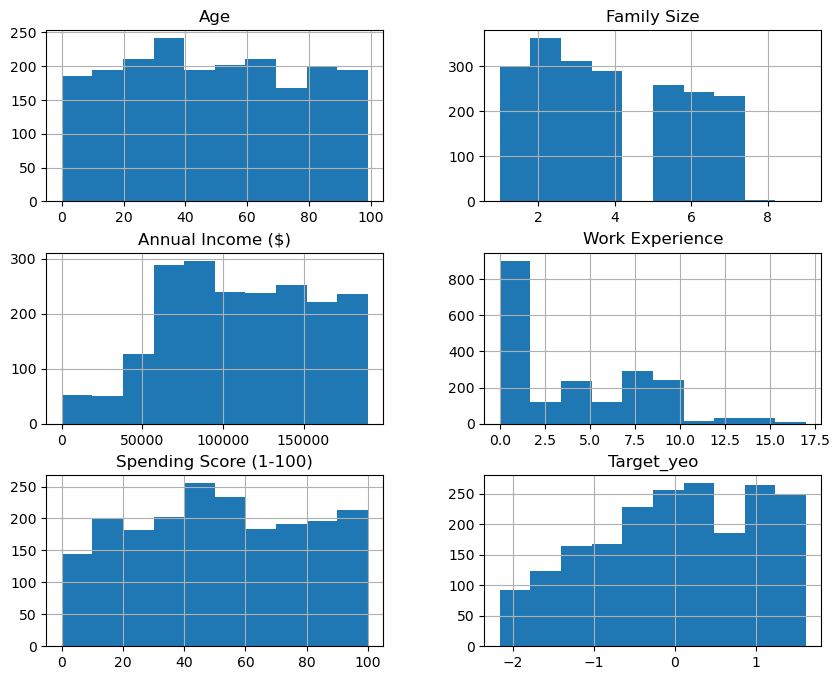

In [20]:
pre_c_df.hist(figsize=(10, 8))

In [21]:
pre_c_df = pre_c_df.drop(labels=['Spending Score (1-100)'], axis=1)
pre_c_df

,Age,Family Size,Annual Income ($),Work Experience,Target_yeo
0,19,4,15000,1,-0.347541
1,21,3,35000,3,1.046767
2,20,1,86000,1,-1.762984
3,23,2,59000,0,0.923214
4,31,6,38000,2,-0.311094
...,...,...,...,...,...
1995,71,7,184387,8,-0.311094
1996,91,7,73158,7,-0.609316
1997,87,2,90961,9,-1.359906
1998,77,2,182109,7,-1.879105


In [22]:
from statsmodels.api import OLS

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Target_yeo   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              1.557
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                       0.183
Time:                        09:30:23   Log-Likelihood:                         -2834.8
No. Observations:                2000   AIC:                                      5678.
Df Residuals:                    1996   BIC:                                      5700.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [23]:
pre_c_df = pre_c_df.drop(labels=['Work Experience'], axis=1)
pre_c_df

,Age,Family Size,Annual Income ($),Target_yeo
0,19,4,15000,-0.347541
1,21,3,35000,1.046767
2,20,1,86000,-1.762984
3,23,2,59000,0.923214
4,31,6,38000,-0.311094
...,...,...,...,...
1995,71,7,184387,-0.311094
1996,91,7,73158,-0.609316
1997,87,2,90961,-1.359906
1998,77,2,182109,-1.879105


In [24]:
from statsmodels.api import OLS

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Target_yeo   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              1.455
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                       0.225
Time:                        09:31:45   Log-Likelihood:                         -2835.7
No. Observations:                2000   AIC:                                      5677.
Df Residuals:                    1997   BIC:                                      5694.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [26]:
get_vif(features)

,vif_score,feature
0,3.138295,Age
1,3.685121,Family Size
2,4.147080,Annual Income ($)


In [27]:
columns = ['Age', 'Family Size', 'Annual Income ($)', 'Work Experience', 'Spending Score (1-100)']
pre_c_df = c_df.loc[:, columns]
pre_c_df

,Age,Family Size,Annual Income ($),Work Experience,Spending Score (1-100)
0,19,4,15000,1,39
1,21,3,35000,3,81
2,20,1,86000,1,6
3,23,2,59000,0,77
4,31,6,38000,2,40
...,...,...,...,...,...
1995,71,7,184387,8,40
1996,91,7,73158,7,32
1997,87,2,90961,9,14
1998,77,2,182109,7,4


In [28]:
from sklearn.preprocessing import PowerTransformer

# box-cox: 양수만 가능
# yeo-johnson: 음수, 0 포함 가능, default

ptf = PowerTransformer(standardize=False)
result = ptf.fit_transform(pre_c_df[['Spending Score (1-100)']])
pre_c_df['Target_yeo'] = result
pre_c_df

,Age,Family Size,Annual Income ($),Work Experience,Spending Score (1-100),Target_yeo
0,19,4,15000,1,39,20.233691
1,21,3,35000,3,81,35.790245
2,20,1,86000,1,6,4.441314
3,23,2,59000,0,77,34.411750
4,31,6,38000,2,40,20.640329
...,...,...,...,...,...,...
1995,71,7,184387,8,40,20.640329
1996,91,7,73158,7,32,17.313011
1997,87,2,90961,9,14,8.938535
1998,77,2,182109,7,4,3.145736


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Family Size'}>],
       [<Axes: title={'center': 'Annual Income ($)'}>,
        <Axes: title={'center': 'Work Experience'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>,
        <Axes: title={'center': 'Target_yeo'}>]], dtype=object)

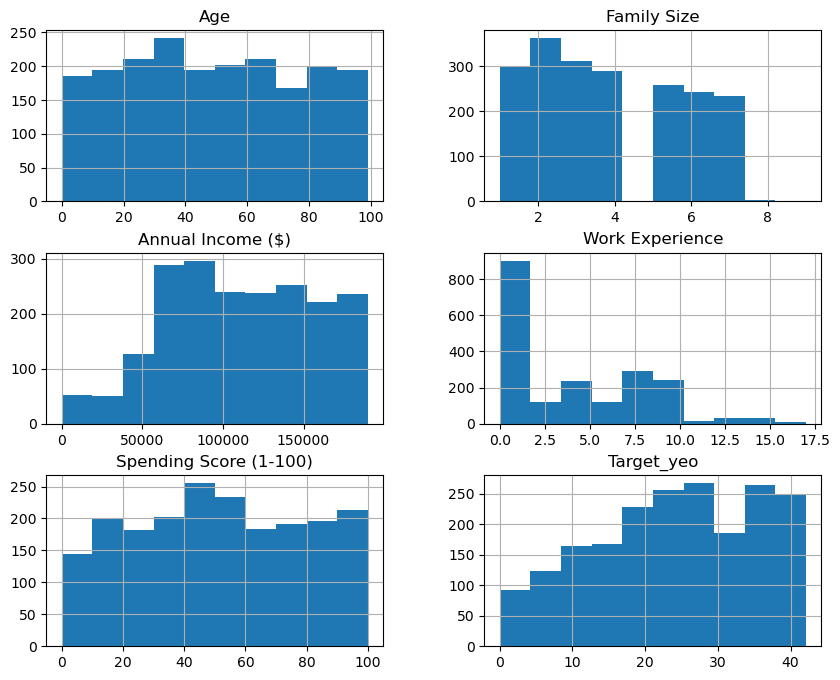

In [30]:
pre_c_df.hist(figsize=(10, 8))

In [31]:
pre_c_df = pre_c_df.drop(labels=['Spending Score (1-100)'], axis=1)
pre_c_df

,Age,Family Size,Annual Income ($),Work Experience,Target_yeo
0,19,4,15000,1,20.233691
1,21,3,35000,3,35.790245
2,20,1,86000,1,4.441314
3,23,2,59000,0,34.411750
4,31,6,38000,2,20.640329
...,...,...,...,...,...
1995,71,7,184387,8,20.640329
1996,91,7,73158,7,17.313011
1997,87,2,90961,9,8.938535
1998,77,2,182109,7,3.145736


In [32]:
from statsmodels.api import OLS

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:             Target_yeo   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.759
Method:                 Least Squares   F-statistic:                              1575.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        09:34:43   Log-Likelihood:                         -7972.4
No. Observations:                2000   AIC:                                  1.595e+04
Df Residuals:                    1996   BIC:                                  1.598e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [34]:
get_vif(features)

,vif_score,feature
0,3.172253,Age
1,3.746431,Family Size
2,4.533660,Annual Income ($)
3,1.993979,Work Experience


In [36]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    # MSLE = mean_squared_log_error(y_test, prediction)
    # RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    # print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
    #       .format(MSE, RMSE, MSLE, RMSLE, R2))
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, R2))

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [45]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 124.5089, RMSE: 11.1584, R2: -0.0080
